In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scipy as sp
import seaborn as sns

from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import datetime as dt

In [2]:
# feature selectors
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression

In [3]:
# Registration

path = 'covid19-public-main/epidemic/'


hospital = pd.read_csv(path + 'hospital.csv')
hospital['date'] = pd.to_datetime(hospital['date'], errors='raise')

# static
icu = pd.read_csv(path + 'icu.csv')
icu['date'] = pd.to_datetime(icu['date'], errors='raise')
# vaccination 
pkrc = pd.read_csv(path + 'pkrc.csv')
pkrc['date'] = pd.to_datetime(pkrc['date'], errors='raise')

In [4]:
hospital

date              state  beds  beds_covid  beds_noncrit  \
0    2020-03-24              Johor  1440         434          1408   
1    2020-03-24              Kedah  1218         143          1183   
2    2020-03-24           Kelantan  1463         280          1424   
3    2020-03-24             Melaka  1091          82          1065   
4    2020-03-24    Negeri Sembilan  1223         253          1205   
...         ...                ...   ...         ...           ...   
8798 2021-10-20           Selangor  5902        1486          5612   
8799 2021-10-20         Terengganu  1557         491          1500   
8800 2021-10-20  W.P. Kuala Lumpur  3963         647          3843   
8801 2021-10-20        W.P. Labuan   122          12           110   
8802 2021-10-20     W.P. Putrajaya   609          84           585   

      admitted_pui  admitted_covid  admitted_total  discharged_pui  \
0                0               0               0               0   
1                0               0               0               0   
2                9               6              15               1   
3                0               0               0               0   
4                0               0               0               0   
...            ...             ...             ...             ...   
8798           192              92             284             104   
8799            14              10              24               6   
8800             0              27              27               5   
8801             0               0               0               0   
8802            19               2              21              19   

      discharged_covid  discharged_total  hosp_covid  hosp_pui  hosp_noncovid  
0                    0                 0          18         9              1  
1                    0                 0          46         5             12  
2                    0                 1          78        58             23  
3                    0                 0          19        10             12  
4                    0                 0          90        13              8  
...                ...               ...         ...       ...            ...  
8798               120               224         694       328           2744  
8799                19                25         174        43            965  
8800                18                23         219        43           1011  
8801                 0                 0           0         0             81  
8802                 1                20          14        31            286  

[8803 rows x 14 columns]

In [5]:
hospital.isnull().sum()

date                0
state               0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64

In [6]:
icu.head()

date            state  beds_icu  beds_icu_rep  beds_icu_total  \
0 2020-03-24            Johor        10            22              32   
1 2020-03-24            Kedah        35             0              35   
2 2020-03-24         Kelantan        39             0              39   
3 2020-03-24           Melaka        26             0              26   
4 2020-03-24  Negeri Sembilan        18             0              18   

   beds_icu_covid  vent  vent_port  icu_covid  icu_pui  icu_noncovid  \
0              10    11          2          0        0             1   
1              16    34          0          2        1            12   
2              20    42          4          1        0            20   
3              12    23          4          0        2            12   
4              10    14          9          0        0             8   

   vent_covid  vent_pui  vent_noncovid  vent_used  vent_port_used  
0           0         0              0          8               0  
1           1         1              0         19               0  
2           1         0              0         26               0  
3           0         1              0         13               5  
4           0         0              0          1               6

In [7]:
icu.isnull().sum()

date              0
state             0
beds_icu          0
beds_icu_rep      0
beds_icu_total    0
beds_icu_covid    0
vent              0
vent_port         0
icu_covid         0
icu_pui           0
icu_noncovid      0
vent_covid        0
vent_pui          0
vent_noncovid     0
vent_used         0
vent_port_used    0
dtype: int64

In [8]:
pkrc.head()

date         state  beds  admitted_pui  admitted_covid  \
0 2020-03-28      Kelantan   147             0               0   
1 2020-03-28        Perlis    54             0               0   
2 2020-03-28  Pulau Pinang    58             0               0   
3 2020-03-28       Sarawak    74             0               0   
4 2020-03-28      Selangor  1452             0              12   

   admitted_total  discharge_pui  discharge_covid  discharge_total  \
0               0              0                0                0   
1               0              0                0                0   
2               0              0                0                0   
3               0              0                0                0   
4              12              0                5                5   

   pkrc_covid  pkrc_pui  pkrc_noncovid  
0           0        53              0  
1           8         3              0  
2          13         0              0  
3          22         0              0  
4         145         0              8

In [9]:
pkrc.isnull().sum()

date               0
state              0
beds               0
admitted_pui       0
admitted_covid     0
admitted_total     0
discharge_pui      0
discharge_covid    0
discharge_total    0
pkrc_covid         0
pkrc_pui           0
pkrc_noncovid      0
dtype: int64

Looking at the data, we can see that there is no need to handle missing/incomplete values as they're all filled in

# Hospital data

In [10]:
hospital.head(20)

date              state  beds  beds_covid  beds_noncrit  \
0  2020-03-24              Johor  1440         434          1408   
1  2020-03-24              Kedah  1218         143          1183   
2  2020-03-24           Kelantan  1463         280          1424   
3  2020-03-24             Melaka  1091          82          1065   
4  2020-03-24    Negeri Sembilan  1223         253          1205   
5  2020-03-24             Pahang   851          87           830   
6  2020-03-24              Perak  1706         211          1667   
7  2020-03-24             Perlis   508          12           495   
8  2020-03-24       Pulau Pinang  1158          86          1132   
9  2020-03-24              Sabah  2598         605          2528   
10 2020-03-24            Sarawak  2390         418          2327   
11 2020-03-24           Selangor   887         504           783   
12 2020-03-24         Terengganu  1232         215          1209   
13 2020-03-24  W.P. Kuala Lumpur  1570         248          1537   
14 2020-03-24        W.P. Labuan   122           9           115   
15 2020-03-25              Johor  1440         511          1408   
16 2020-03-25              Kedah  1218         165          1183   
17 2020-03-25           Kelantan  1365          66          1321   
18 2020-03-25             Melaka  1091          95          1065   
19 2020-03-25    Negeri Sembilan  1223         262          1205   

    admitted_pui  admitted_covid  admitted_total  discharged_pui  \
0              0               0               0               0   
1              0               0               0               0   
2              9               6              15               1   
3              0               0               0               0   
4              0               0               0               0   
5              0               0               0               0   
6              0               0               0               0   
7              0               0               0               0   
8              0               0               0               0   
9              0               0               0               0   
10             0               0               0               0   
11             5              16              21               0   
12             0               0               0               0   
13             0               0               0               0   
14             0               0               0               0   
15            20              14              34              26   
16            17               5              22               0   
17             0               0               0               0   
18             0               2               2               0   
19             1              16              17               2   

    discharged_covid  discharged_total  hosp_covid  hosp_pui  hosp_noncovid  
0                  0                 0          18         9              1  
1                  0                 0          46         5             12  
2                  0                 1          78        58             23  
3                  0                 0          19        10             12  
4                  0                 0          90        13              8  
5                  0                 0          36        14             14  
6                  1                 1          78        40              6  
7                  0                 0           7         8              8  
8                  0                 0          68         2              8  
9                  0                 0         161        46             35  
10                 0                 0          73        85             29  
11                24                24         261        39            184  
12                 0                 0           9         6             14  
13                 0                 0          70        1

In [11]:
hospital.tail(20)

date              state  beds  beds_covid  beds_noncrit  \
8783 2021-10-19         Terengganu  1557         491          1500   
8784 2021-10-19  W.P. Kuala Lumpur  3963         647          3841   
8785 2021-10-19        W.P. Labuan   122         106            99   
8786 2021-10-19     W.P. Putrajaya   609          84           585   
8787 2021-10-20              Johor  5160        2753          5010   
8788 2021-10-20              Kedah  2664        1259          2522   
8789 2021-10-20           Kelantan  2815         923          2629   
8790 2021-10-20             Melaka  1317         651          1225   
8791 2021-10-20    Negeri Sembilan  1749        1084          1639   
8792 2021-10-20             Pahang  2066         709          1948   
8793 2021-10-20              Perak  3277         971          3141   
8794 2021-10-20             Perlis   487         213           468   
8795 2021-10-20       Pulau Pinang  1985         638          1847   
8796 2021-10-20              Sabah  4109        1797          3863   
8797 2021-10-20            Sarawak  4055        1430          3853   
8798 2021-10-20           Selangor  5902        1486          5612   
8799 2021-10-20         Terengganu  1557         491          1500   
8800 2021-10-20  W.P. Kuala Lumpur  3963         647          3843   
8801 2021-10-20        W.P. Labuan   122          12           110   
8802 2021-10-20     W.P. Putrajaya   609          84           585   

      admitted_pui  admitted_covid  admitted_total  discharged_pui  \
8783            22              36              58               7   
8784             3              29              32               1   
8785             0               0               0               2   
8786            25               1              26              16   
8787            72              56             128              32   
8788             4              25              29               2   
8789            18              97             115               4   
8790             5              11              16               5   
8791            12              33              45              11   
8792             5              15              20               2   
8793            22              46              68               2   
8794             7               7              14              16   
8795             1              28              29               1   
8796            48              43              91              45   
8797           103             214             317             139   
8798           192              92             284             104   
8799            14              10              24               6   
8800             0              27              27               5   
8801             0               0               0               0   
8802            19               2              21              19   

      discharged_covid  discharged_total  hosp_covid  hosp_pui  hosp_noncovid  
8783                38                45         184        35            961  
8784                15                16         212        55           1027  
8785                 0                 2           0         0             72  
8786                 3                19          13        33            256  
8787                69               101         728       103           2878  
8788                12                14         230         9           1574  
8789                48                52         608        58           1348  
8790                 5                10         112        12            859  
8791                26                37         209        36            826  
8792                32                34         198        24            987  
8793                60                62         475        28           1825  
8794                11                27          58        15            234  
8795                40       

In [12]:
analysis = hospital.copy()
#analysis.set_index('date', inplace=True)

<AxesSubplot:xlabel='date', ylabel='beds_covid'>

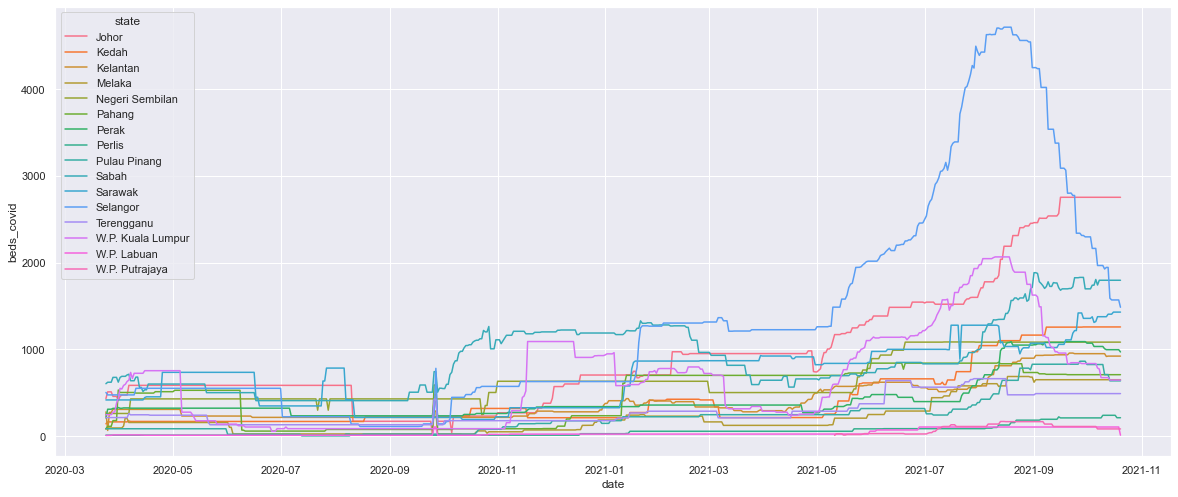

In [13]:

#For this specific example the best solution would be to use the following
#plt.figure(figsize=(20, 20))
#analysis.set_index("date", inplace=True)
#analysis.groupby("state")["beds_covid"].plot(legend=True, xlabel="date", ylabel="beds_covid")

sns.set(rc={'figure.figsize':(20, 8.27)})

sns.lineplot(x="date", y="beds_covid", hue="state", data=analysis)

Bed allocation for covid goes outward to 5000 for Selangor before going down. Most states have roughly 1000 beds allocated for covid by August 2021.

<AxesSubplot:xlabel='date', ylabel='hosp_covid'>

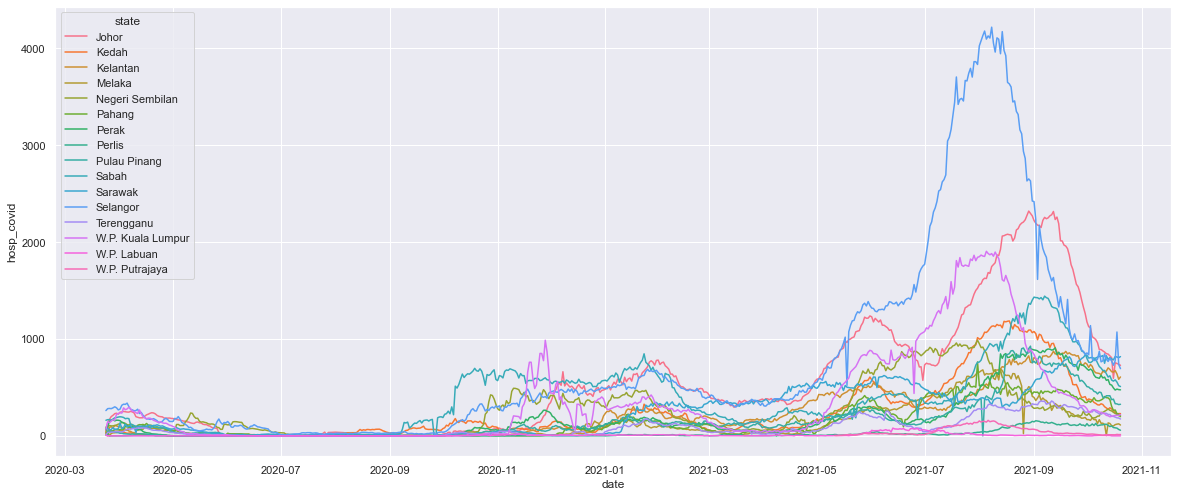

In [14]:
#plt.figure(figsize=(20, 15))
#analysis.groupby("state")["hosp_covid"].plot(legend=True, xlabel="date", ylabel="hosp_covid")
sns.set(rc={'figure.figsize':(20, 8.27)})

sns.lineplot(x="date", y="hosp_covid", hue="state", data=analysis)

Selangor has the highest bed used for covid, which is roughly 4000 beds. Other states used roughly 1000 beds around September-October 2021, as cases also went up during that time period.

## Beds utilization (covid beds to covid cases in hospitals)

PUI and COVID counts for bed utilization. Here we're measuring the bed utilization rate for COVID cases by each states.

In [15]:
# hosp_covid	hosp_pui
analysis

date              state  beds  beds_covid  beds_noncrit  \
0    2020-03-24              Johor  1440         434          1408   
1    2020-03-24              Kedah  1218         143          1183   
2    2020-03-24           Kelantan  1463         280          1424   
3    2020-03-24             Melaka  1091          82          1065   
4    2020-03-24    Negeri Sembilan  1223         253          1205   
...         ...                ...   ...         ...           ...   
8798 2021-10-20           Selangor  5902        1486          5612   
8799 2021-10-20         Terengganu  1557         491          1500   
8800 2021-10-20  W.P. Kuala Lumpur  3963         647          3843   
8801 2021-10-20        W.P. Labuan   122          12           110   
8802 2021-10-20     W.P. Putrajaya   609          84           585   

      admitted_pui  admitted_covid  admitted_total  discharged_pui  \
0                0               0               0               0   
1                0               0               0               0   
2                9               6              15               1   
3                0               0               0               0   
4                0               0               0               0   
...            ...             ...             ...             ...   
8798           192              92             284             104   
8799            14              10              24               6   
8800             0              27              27               5   
8801             0               0               0               0   
8802            19               2              21              19   

      discharged_covid  discharged_total  hosp_covid  hosp_pui  hosp_noncovid  
0                    0                 0          18         9              1  
1                    0                 0          46         5             12  
2                    0                 1          78        58             23  
3                    0                 0          19        10             12  
4                    0                 0          90        13              8  
...                ...               ...         ...       ...            ...  
8798               120               224         694       328           2744  
8799                19                25         174        43            965  
8800                18                23         219        43           1011  
8801                 0                 0           0         0             81  
8802                 1                20          14        31            286  

[8803 rows x 14 columns]

In [16]:
analysis['covid_bed_utlization'] = (((analysis['hosp_covid']) / analysis['beds_covid']) * 100).round(2)
#analysis['covid_bed_utlization'] = (((analysis['hosp_covid'] + analysis['hosp_pui']) / analysis['beds_covid']) * 100).round(2)

<AxesSubplot:xlabel='date', ylabel='covid_bed_utlization'>

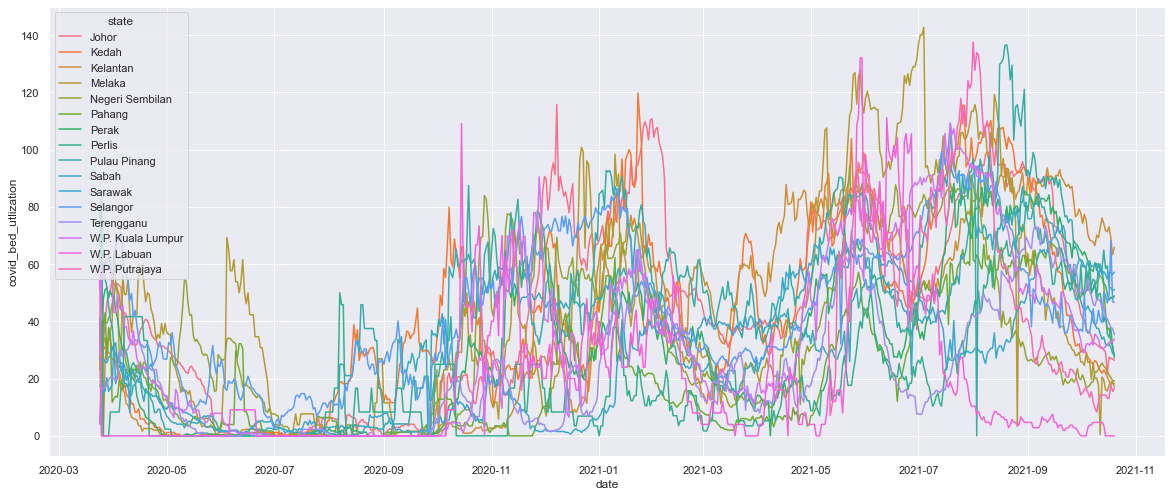

In [18]:
sns.set(rc={'figure.figsize':(20, 8.27)})

sns.lineplot(x="date", y="covid_bed_utlization", hue="state", data=analysis)
# https://stackoverflow.com/questions/40071096/how-to-plot-multiple-lines-in-one-figure-in-pandas-python-based-on-data-from-mul
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn

In [19]:
# sns.relplot(
#     data=analysis,
#     x="date", y="covid_bed_utlization", 
#     hue="state", style="state"
# )

From here we can see that for the past 6 months, COVID cases has been rather taxing to our healthcare system, as the utilization for beds for COVID cases reaches 100% (and went over it!) for states like W.P Kuala Lumpur, Selangor, Pulau Pinang. More and more beds for other non-COVID cases has to be allocated for COVID in order to make room for the patients. This also leads to the  decline of the healthcare quality provided to the rest of population

<AxesSubplot:>

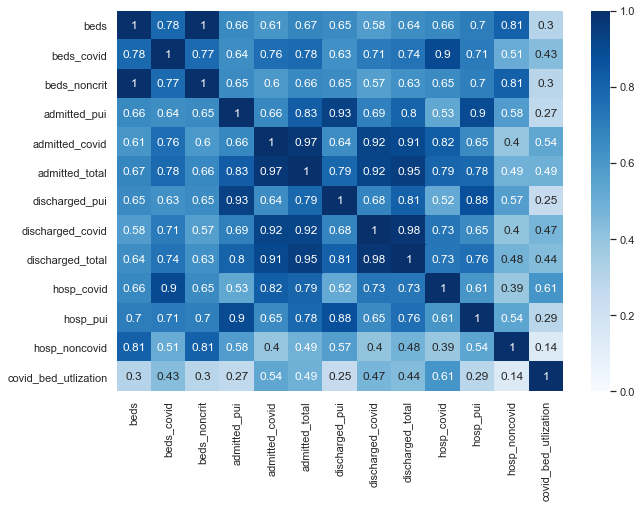

In [20]:
columns_list = analysis.columns
columns_list.delete(0)

#analysis.groupby('ID')[['Val1','Val2']].corr()
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(analysis[columns_list].corr(), cmap='Blues', annot=True, vmin=0, vmax=1)

From the correlation plot, we can see that most of the admission to hospital are mostly COVID-19 cases (strong correlation). We can also see high correlation between beds_covid and hosp_covid, as new beds are allocated for the COVID-19 cases as the numbers goes up

## ICU

In [21]:
icu.head()

date            state  beds_icu  beds_icu_rep  beds_icu_total  \
0 2020-03-24            Johor        10            22              32   
1 2020-03-24            Kedah        35             0              35   
2 2020-03-24         Kelantan        39             0              39   
3 2020-03-24           Melaka        26             0              26   
4 2020-03-24  Negeri Sembilan        18             0              18   

   beds_icu_covid  vent  vent_port  icu_covid  icu_pui  icu_noncovid  \
0              10    11          2          0        0             1   
1              16    34          0          2        1            12   
2              20    42          4          1        0            20   
3              12    23          4          0        2            12   
4              10    14          9          0        0             8   

   vent_covid  vent_pui  vent_noncovid  vent_used  vent_port_used  
0           0         0              0          8               0  
1           1         1              0         19               0  
2           1         0              0         26               0  
3           0         1              0         13               5  
4           0         0              0          1               6

In [22]:
icu.tail()

date              state  beds_icu  beds_icu_rep  beds_icu_total  \
8818 2021-10-20           Selangor       169           121             290   
8819 2021-10-20         Terengganu        27            30              57   
8820 2021-10-20  W.P. Kuala Lumpur        79            41             120   
8821 2021-10-20        W.P. Labuan         5             7              12   
8822 2021-10-20     W.P. Putrajaya        14             6              20   

      beds_icu_covid  vent  vent_port  icu_covid  icu_pui  icu_noncovid  \
8818             164   534         19        100        0            90   
8819              37    66         40         22        0            17   
8820              46   213         28         26        0            58   
8821               7    15          0          0        0             3   
8822               6    37          0          0        0            11   

      vent_covid  vent_pui  vent_noncovid  vent_used  vent_port_used  
8818          58         0             49        142               4  
8819          14         0              9         39              11  
8820          14         0             18         81               0  
8821           0         0              3          3               0  
8822           0         0              9          9               0

In [23]:
columns_list = icu.columns
columns_list.delete(0)

analysis = icu.copy()

<AxesSubplot:>

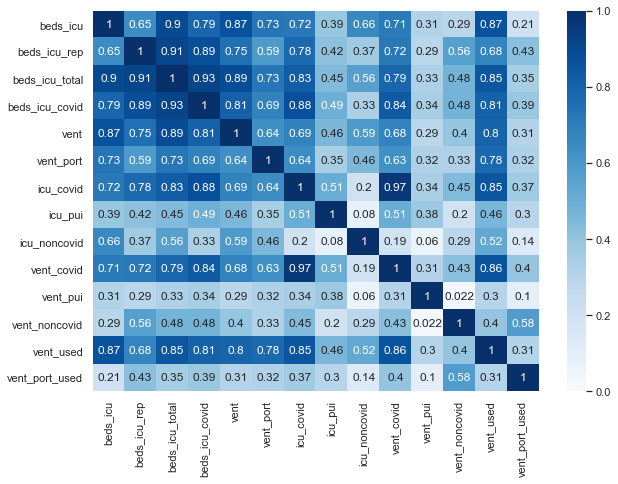

In [24]:
sns.heatmap(analysis[columns_list].corr(), cmap='Blues', annot=True, vmin=0, vmax=1)

Looking at the correlation plot, we can see that beds_icu_total and beds_icu covid has a really correlation (>0.9) with each other, implying that a lot of ICU beds are allocated to handle critical COVID cases. 

In [25]:
temp = analysis[columns_list]

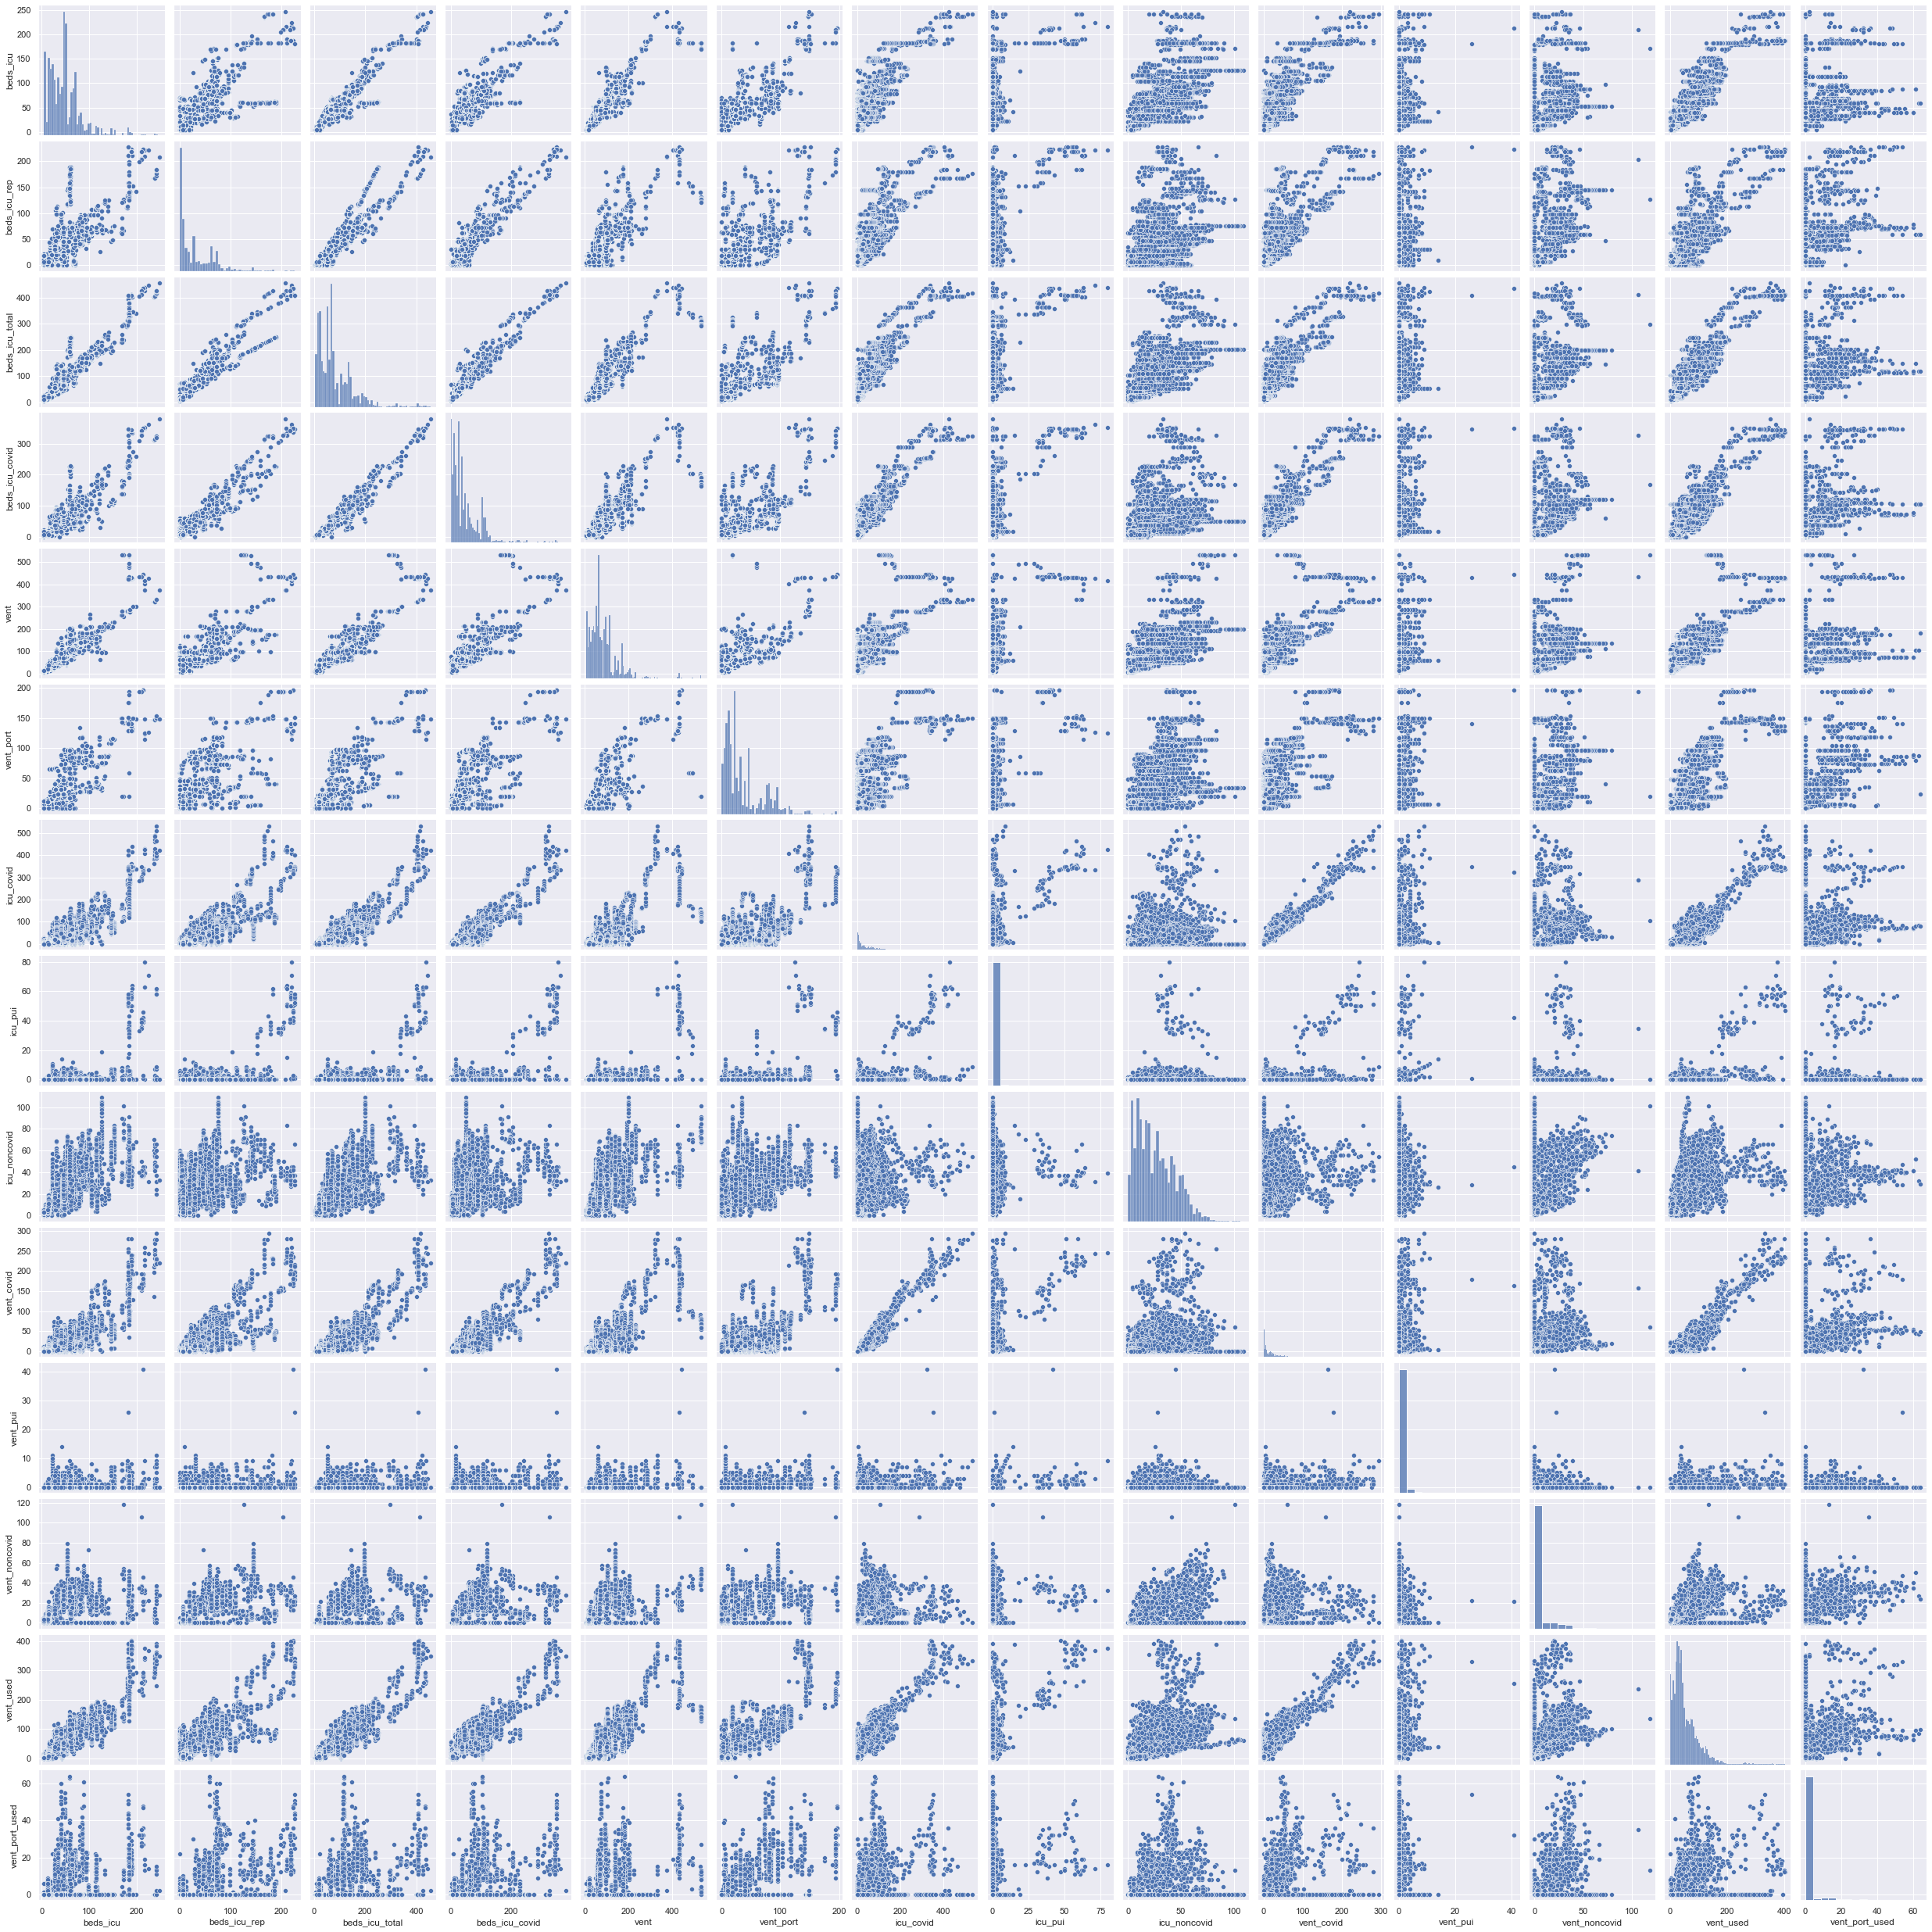

In [26]:
sns.pairplot(temp)

<AxesSubplot:xlabel='date', ylabel='beds_icu_total'>

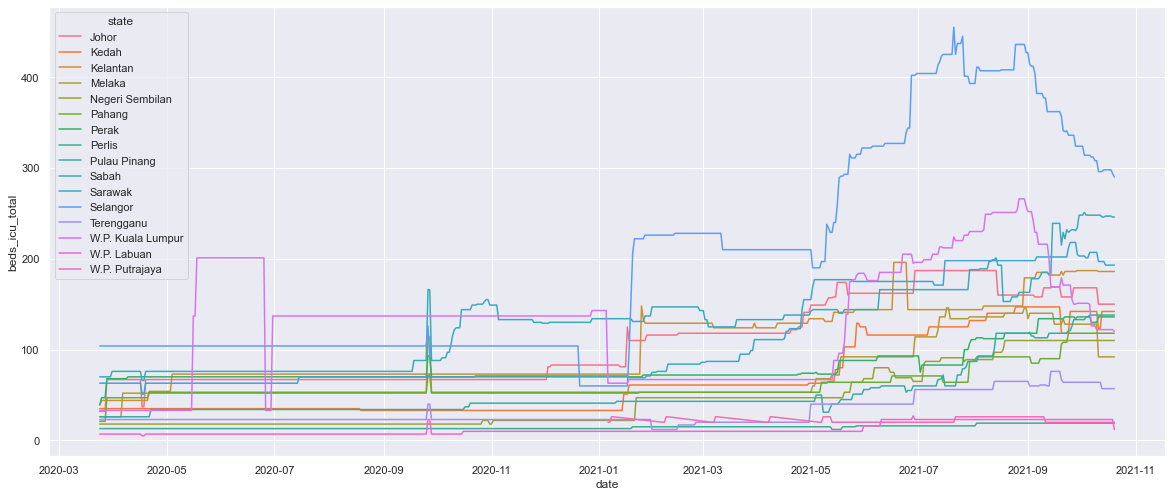

In [27]:
#plt.figure(figsize=(20, 15))
#analysis.groupby("state")["beds_icu_total"].plot(legend=True, xlabel="date", ylabel="beds_icu_total")


sns.set(rc={'figure.figsize':(20, 8.27)})

sns.lineplot(x="date", y="beds_icu_total", hue="state", data=analysis)


# PKRC

In [28]:
analysis = pkrc.copy()
analysis.set_index('date', inplace=True)

In [29]:
analysis.tail(20)

state  beds  admitted_pui  admitted_covid  \
date                                                              
2021-10-19     Pulau Pinang   879             0              22   
2021-10-19            Sabah  3512             6             149   
2021-10-19          Sarawak  6742            27              19   
2021-10-19         Selangor  3156             0             196   
2021-10-19       Terengganu  2232            17             143   
2021-10-19      W.P. Labuan   251             4               0   
2021-10-20            Johor  2648             0              58   
2021-10-20            Kedah   786             0              28   
2021-10-20         Kelantan  2173             2             113   
2021-10-20           Melaka  1351             0              29   
2021-10-20  Negeri Sembilan   224             0              31   
2021-10-20           Pahang  4177             5             110   
2021-10-20            Perak   884             0              16   
2021-10-20           Perlis   234             0               3   
2021-10-20     Pulau Pinang   879             0              25   
2021-10-20            Sabah  3624             5             147   
2021-10-20          Sarawak  6742            43              28   
2021-10-20         Selangor  3156             0             169   
2021-10-20       Terengganu  2232            17              52   
2021-10-20      W.P. Labuan   251             6               0   

            admitted_total  discharge_pui  discharge_covid  discharge_total  \
date                                                                          
2021-10-19              22              0               28               28   
2021-10-19             155              3              145              148   
2021-10-19              46             20               58               78   
2021-10-19             196              1              239              240   
2021-10-19             160             10              148              158   
2021-10-19               4              0                0                0   
2021-10-20              58              1              123              124   
2021-10-20              28              0               54               54   
2021-10-20             115              2              176              178   
2021-10-20              29              0               58               58   
2021-10-20              31              0                0                0   
2021-10-20             115             12              187              199   
2021-10-20              16              0               47               47   
2021-10-20               3              0                3                3   
2021-10-20              25              0               13               13   
2021-10-20             152              3              133              136   
2021-10-20              71             24               53               77   
2021-10-20             169              4              224              228   
2021-10-20              69             22              140              162   
2021-10-20               6              0                1                1   

            pkrc_covid  pkrc_pui  pkrc_noncovid  
date                                             
2021-10-19         189         0              0  
2021-10-19        1168        58              0  
2021-10-19        2300       771              0  
2021-10-19        1714        22              0  
2021-10-19        1113        59              0  
2021-10-19           4         7              0  
2021-10-20         835         8              3  
2021-10-20         235         0              0  
2021-10-20        1370        11              0  
2021-10-20         493         0              0  
2021-10-20         185         0              0  
2021-10-20        1254        77              0  
2021-10-20         232         0             98  
2021-10-20          49         2              0  
2021-10-

<AxesSubplot:xlabel='date', ylabel='pkrc_covid'>

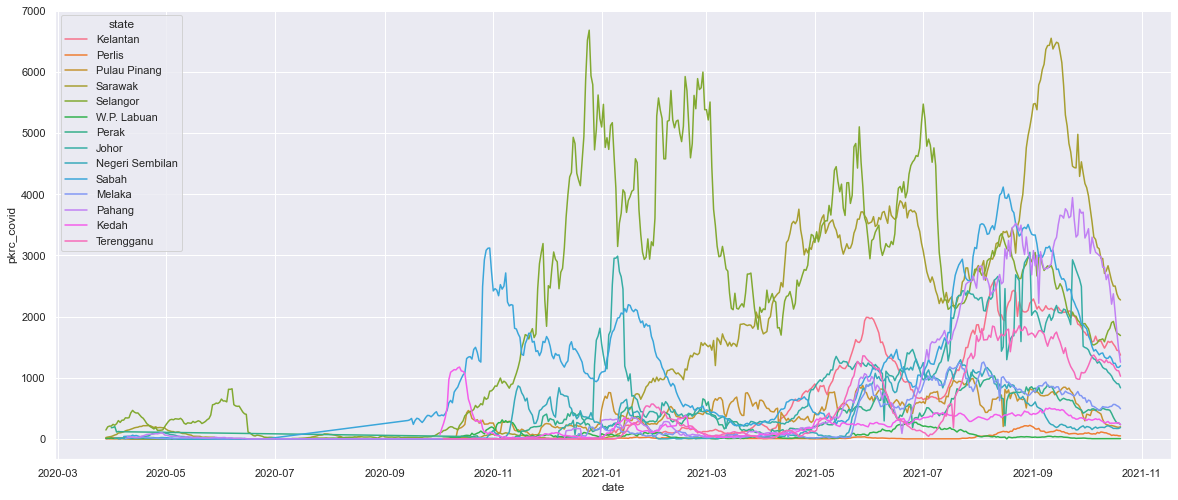

In [30]:
#For this specific example the best solution would be to use the following
# plt.figure(figsize=(20, 20))
# #analysis.set_index("date", inplace=True)
# analysis.groupby("state")["pkrc_covid"].plot(legend=True, xlabel="date", ylabel="pkrc_covid")

sns.set(rc={'figure.figsize':(20, 8.27)})

sns.lineplot(x="date", y="pkrc_covid", hue="state", data=analysis)


In [31]:
columns_list = pkrc.columns
columns_list = columns_list.delete(0)
columns_list = columns_list.delete(0)

<AxesSubplot:>

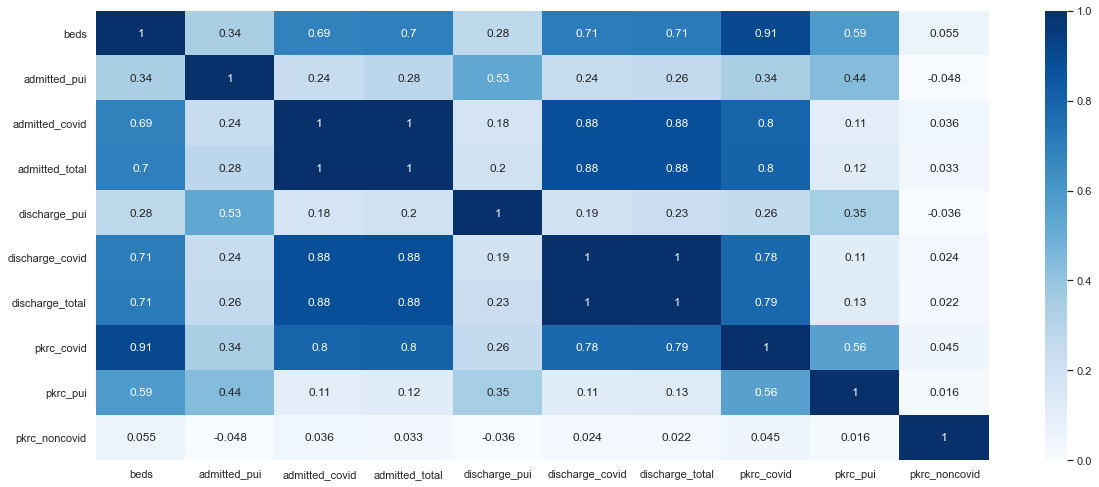

In [32]:
sns.heatmap(analysis[columns_list].corr(), cmap='Blues', annot=True, vmin=0, vmax=1)

In [33]:
analysis_malaysia = analysis.groupby(by='date', axis=0, level=None, as_index=True, sort=True, group_keys=True).sum()

In [34]:
analysis_malaysia

beds  admitted_pui  admitted_covid  admitted_total  \
date                                                              
2020-03-28   1882             0              13              13   
2020-03-29   1882            19              41              60   
2020-03-30   1882            35              22              57   
2020-03-31   2209            10              34              44   
2020-04-01   2237             1              29              30   
...           ...           ...             ...             ...   
2021-10-16  29077           140            1187            1327   
2021-10-17  29149            68             984            1052   
2021-10-18  29149            39             909             948   
2021-10-19  29249            64            1060            1124   
2021-10-20  29361            78             809             887   

            discharge_pui  discharge_covid  discharge_total  pkrc_covid  \
date                                                                      
2020-03-28              1                5                6         194   
2020-03-29              6                6               12         252   
2020-03-30              3               26               29         278   
2020-03-31             49               21               70         471   
2020-04-01              8               25               33         512   
...                   ...              ...              ...         ...   
2021-10-16             53             1557             1610       13374   
2021-10-17             55             1601             1656       12771   
2021-10-18             64             1562             1626       11965   
2021-10-19             55             1279             1334       11558   
2021-10-20             68             1212             1280       11037   

            pkrc_pui  pkrc_noncovid  
date                                 
2020-03-28        64              8  
2020-03-29        59              2  
2020-03-30        98             10  
2020-03-31        58             14  
2020-04-01        70             22  
...              ...            ...  
2021-10-16      1023            101  
2021-10-17      1028            109  
2021-10-18       970            104  
2021-10-19      1034             95  
2021-10-20       929            101  

[572 rows x 10 columns]

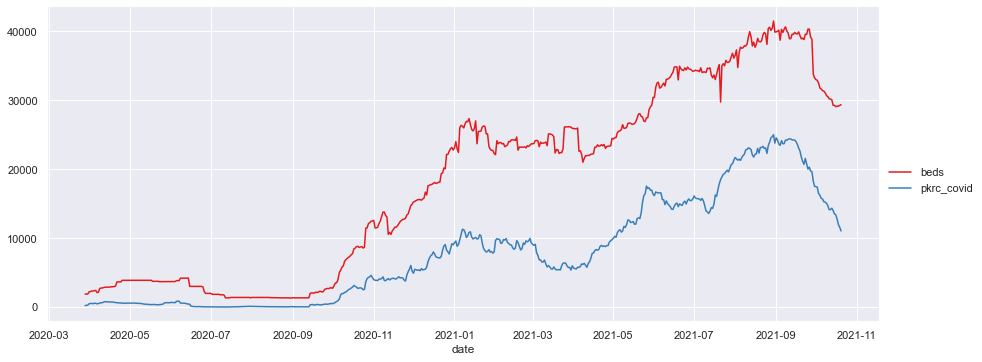

In [35]:
ax = sns.relplot(data=analysis_malaysia.loc[:,['beds', 'pkrc_covid']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')

A lot of beds are opened for the quarantine center to handle the growing number of quarantines and suspected COVID-19 cases. A big gap between beds and `pkrc_covid` implies that the healthcare system trying it's best to make sure all of the patients can be accomadated in the quarantine centre

In [36]:
income = pd.read_csv('random_dataset/mean-monthly-household-gross-income.csv')

In [37]:
income.tail(20)

Country/State  Year Mean Monthly Household Gross Income
133  W.P. Putrajaya  2014                               10401
134  W.P. Putrajaya  2016                               11555
135  W.P. Putrajaya  2019                               12840
136        Malaysia  2020                                7089
137           Johor  2020                                7264
138           Kedah  2020                                5005
139        Kelantan  2020                                4411
140          Melaka  2020                                7186
141      N.Sembilan  2020                                6184
142          Pahang  2020                                5144
143        P.Pinang  2020                                6850
144           Perak  2020                                5081
145          Perlis  2020                                4971
146        Selangor  2020                                9668
147      Terengganu  2020                                6051
148           Sabah  2020                                5215
149         Sarawak  2020                                5087
150          W.P.KL  2020                               11728
151      W.P.Labuan  2020                                7333
152  W.P. Putrajaya  2020                               12322

In [38]:
income.head(20)

Country/State  Year Mean Monthly Household Gross Income
0       Malaysia  2002                                3011
1       Malaysia  2004                                3249
2       Malaysia  2007                                3686
3       Malaysia  2009                                4025
4       Malaysia  2012                                5000
5       Malaysia  2014                                6141
6       Malaysia  2016                                6958
7       Malaysia  2019                                7901
8          Johor  2002                                2963
9          Johor  2004                                3076
10         Johor  2007                                3457
11         Johor  2009                                3835
12         Johor  2012                                4658
13         Johor  2014                                6207
14         Johor  2016                                6928
15         Johor  2019                                8013
16         Kedah  2002                                1966
17         Kedah  2004                                2126
18         Kedah  2007                                2408
19         Kedah  2009                                2667